In [1]:
# statistics

In [2]:
import json
import pprint
from PIL import Image, ImageFilter
from PIL import ImageDraw

import glob
import re
import os
from loguru import logger
from tqdm import tqdm
#from tqdm import tqdm_notebook as tqdm
import numpy as np

import random
import pandas as pd

import cv2
import sys
import shutil

import numpy as np
import matplotlib.pyplot as plt
from xml.etree.ElementTree import Element, SubElement, ElementTree
import pandas as pd

from matplotlib.colors import rgb2hex

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
!pip install seaborn

In [4]:
root_path = "/home/Pokemon-SV"
datasets_root = "/home/Pokemon-SV-Datasets"

datasets_dir  = "datasets"
datasets_ver  = "v2.2"
datasets_path = datasets_root  + "/" + datasets_dir + "/" + datasets_ver
datasets_root_path = datasets_root  + "/" + datasets_dir
os.makedirs(datasets_path, exist_ok=True)


anotate_train_name = "pokemon_sv_train.json"
anotate_train_path = datasets_path + "/" + anotate_train_name
anotate_valid_name = "pokemon_sv_valid.json"
anotate_valid_path = datasets_path + "/" + anotate_valid_name

small_th = 32*32
medium_th = 96*96
#large_th

In [6]:
with open(anotate_train_path, 'rt', encoding='UTF-8') as annotations:
    coco_train = json.load(annotations)
with open(anotate_valid_path, 'rt', encoding='UTF-8') as annotations:
    coco_valid = json.load(annotations)

In [7]:
coco_train.keys()

dict_keys(['annotations', 'categories', 'images', 'info', 'licenses'])

In [8]:
len(coco_train['annotations'])

2221

In [9]:
coco_train['annotations'][0]

{'area': 40755,
 'bbox': [789, 701, 195, 209],
 'category_id': 75,
 'id': 0,
 'ignore': 0,
 'image_id': 0,
 'iscrowd': 0,
 'segmentation': []}

In [10]:
df_coco_train = pd.DataFrame(coco_train['annotations'])
df_coco_train["datasets_type"] = "train"
#df_coco_train = df_coco_train.set_index('id')

In [11]:
df_coco_valid = pd.DataFrame(coco_valid['annotations'])
df_coco_valid["datasets_type"] = "valid"
#df_coco_valid = df_coco_train.set_index('id')

In [12]:
df_total = pd.concat([df_coco_train, df_coco_valid], axis=0)

In [13]:
df_total["scale"] = ""
df_total.loc[df_total["area"] < small_th, "scale"] = 1
df_total.loc[(small_th <= df_total["area"]) & (df_total["area"] < medium_th), "scale"] = 2
df_total.loc[medium_th < df_total["area"], "scale"] = 3

In [14]:
#df_coco_train["scale"] = ""
#df_coco_train.loc[df_coco_train["area"] < small_th, "scale"] = 1
#df_coco_train.loc[(small_th <= df_coco_train["area"]) & (df_coco_train["area"] < medium_th), "scale"] = 2
#df_coco_train.loc[medium_th < df_coco_train["area"], "scale"] = 3

In [17]:
df_total

,area,bbox,category_id,id,ignore,image_id,iscrowd,segmentation,datasets_type,scale
0,40755,"[789, 701, 195, 209]",75,0,0,0,0,[],train,3
1,1188,"[918, 230, 36, 33]",47,2,0,0,0,[],train,2
2,868,"[381, 169, 31, 28]",73,4,0,1,0,[],train,1
3,396,"[751, 158, 22, 18]",73,6,0,1,0,[],train,1
4,952,"[1136, 124, 28, 34]",73,8,0,1,0,[],train,1
...,...,...,...,...,...,...,...,...,...,...
550,52256,"[894, 586, 142, 368]",75,1101,0,318,0,[],valid,3
551,575,"[1732, 132, 25, 23]",53,1103,0,318,0,[],valid,1
552,46368,"[869, 502, 138, 336]",75,1105,0,319,0,[],valid,3
553,1716,"[1857, 110, 44, 39]",52,1107,0,319,0,[],valid,2


In [18]:
df_total2 = df_total.drop('bbox', axis=1)

In [19]:
df_total2

,area,category_id,id,ignore,image_id,iscrowd,segmentation,datasets_type,scale
0,40755,75,0,0,0,0,[],train,3
1,1188,47,2,0,0,0,[],train,2
2,868,73,4,0,1,0,[],train,1
3,396,73,6,0,1,0,[],train,1
4,952,73,8,0,1,0,[],train,1
...,...,...,...,...,...,...,...,...,...
550,52256,75,1101,0,318,0,[],valid,3
551,575,53,1103,0,318,0,[],valid,1
552,46368,75,1105,0,319,0,[],valid,3
553,1716,52,1107,0,319,0,[],valid,2


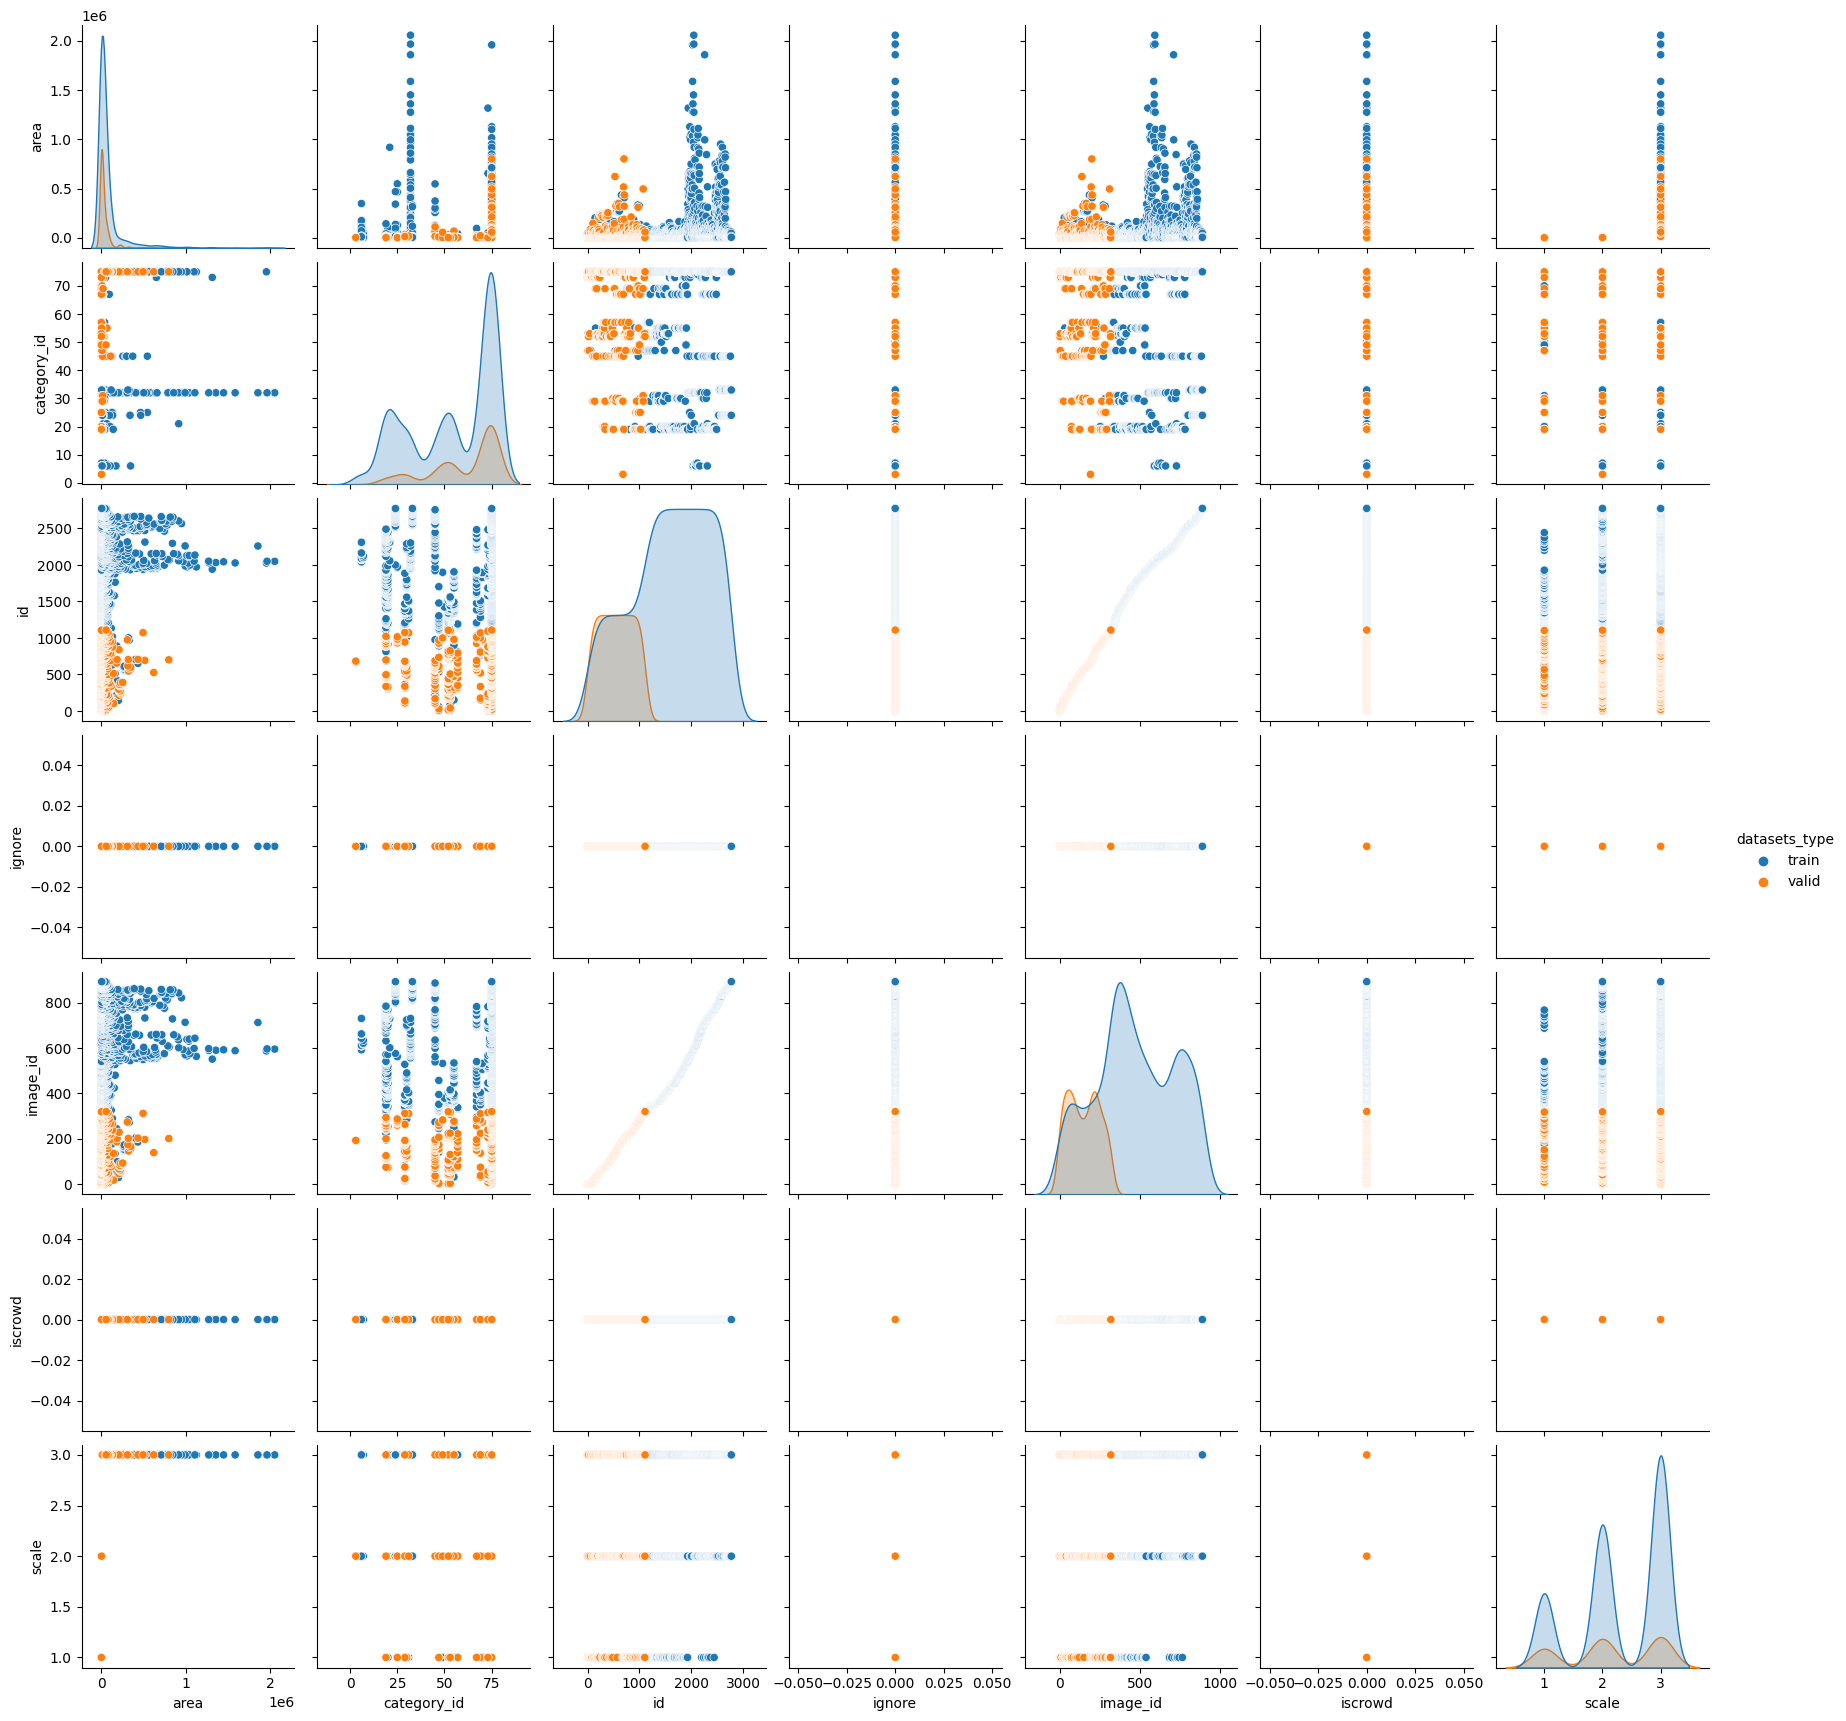

In [21]:
#sns.pairplot(df_coco_train2, hue='scale')
sns.pairplot(df_total2, hue='datasets_type')

#sns.pairplot(df_total2)
plt.show()

In [22]:
df_total2.describe()

NameError: name 'df_coco_train2' is not defined